# pysat demo using pysatSeasons for generalized instrument independent analysis

In [1]:
import datetime as dt
import logging
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
import pysat

In [3]:
# Set data directory if user hasn't already set one
print(f"old: {pysat.params['data_dirs']}")
if len(pysat.params['data_dirs']) == 0 or pysat.params['data_dirs'] == ['.']:
    # Set a directory for pysat to use for data
    pysat.params['data_dirs'] = '/home/jovyan/scratch_space/.pysat/'
else:
    print('pysat directory has been set previously. Leaving unchanged.')

print(f"new: {pysat.params['data_dirs']}")

old: ['/home/jovyan/scratch_space/.pysat']
pysat directory has been set previously. Leaving unchanged.
new: ['/home/jovyan/scratch_space/.pysat']


In [4]:
import pysatNASA
import pysatSeasons

In [5]:
# Register pysatNASA ICON IVM data plug-in. Only required once per install.
pysat.utils.registry.register(['pysatNASA.instruments.icon_ivm'])

In [6]:
# Instantiate IVM instrument data and set the range of dates for the analysis
ivm = pysat.Instrument('icon', 'ivm', inst_id='a')
ivm.bounds = (dt.datetime(2020, 1, 1), dt.datetime(2020, 1, 5))

# Improvements for loading ICON metadata are currently in 
# https://github.com/pysat/pysatNASA/pull/100. 
warnings.simplefilter('ignore', UserWarning)

In [7]:
# Modify data as it is loaded to add a log ion density measurement
def add_log_dens(inst):
    """Calculate Log Ion Density.
    
    Parameters
    ----------
    inst : pysat.Instrument
        Instrument object to operate upon.
        
    """
    inst['Log_Ion_Density'] = np.log10(inst['Ion_Density'])
    
    return

# Attach to IVM
ivm.custom_attach(add_log_dens)

In [8]:
# Seasonal bin average of ICON IVM temperature and density data
results = pysatSeasons.avg.median2D(ivm, [0., 24., 24], 'Magnetic_Local_Time', 
                                    [0., 360., 30], 'Longitude', ['Ion_Temperature', 'Log_Ion_Density'],
                                    return_data=True)

Text(0.5, 0, 'Magnetic Local Time')

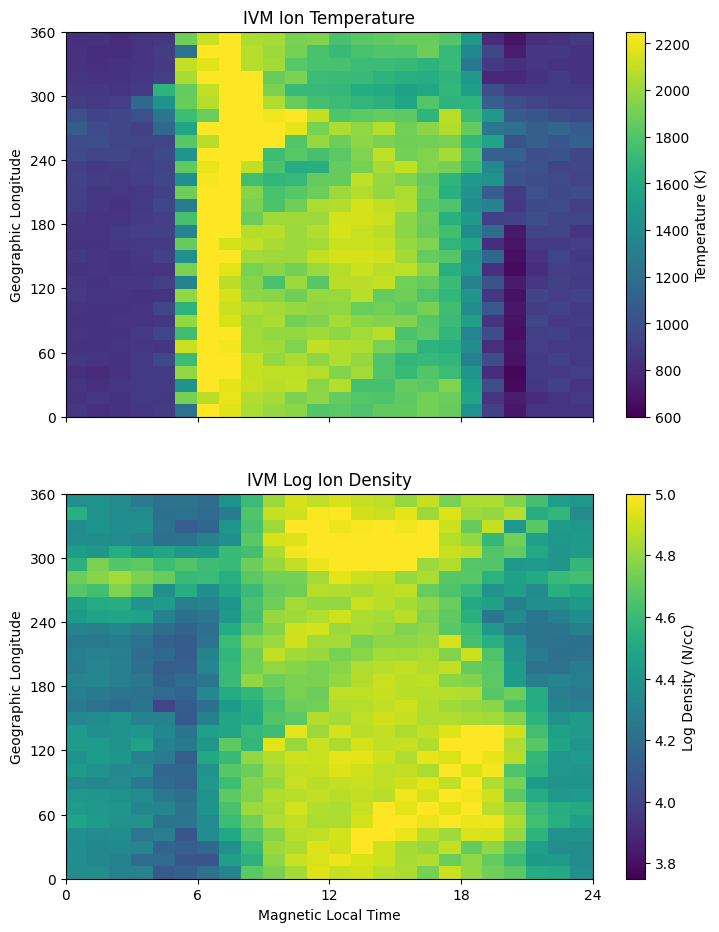

In [9]:
# The work is done, plot the results!

# Make IVM seasonal average plots
f, axarr = plt.subplots(2, sharex=True, sharey=True, figsize=(8.5, 11))
cax = []

# Ion temperature average data
temps = results['Ion_Temperature']['median']

# Values of bins along x, y
x_arr = results['Ion_Temperature']['bin_x']
y_arr = results['Ion_Temperature']['bin_y']

# Mask out NaN values
masked = np.ma.array(temps, mask=np.isnan(temps))

# Plot, NaN values are white.
# Note how the data returned from the median function is in plot order.
cax.append(axarr[0].pcolor(x_arr, y_arr,
                           masked, vmax=2250., vmin=600.,
                           edgecolors='none'))
axarr[0].set_ylim(0, 360)
axarr[0].set_xticks([0, 6, 12, 18, 24])
axarr[0].set_xlim(0, 24)
axarr[0].set_yticks(np.arange(0, 420, 60))
axarr[0].set_title('IVM Ion Temperature')
axarr[0].set_ylabel('Geographic Longitude')

cbar0 = f.colorbar(cax[0], ax=axarr[0])
cbar0.set_label('Temperature (K)')


# Ion temperature average
dens = results['Log_Ion_Density']['median']
x_arr = results['Log_Ion_Density']['bin_x']
y_arr = results['Log_Ion_Density']['bin_y']

# Mask out NaN values
masked = np.ma.array(dens, mask=np.isnan(temps))

# Plot, NaN values are white.
# Note how the data returned from the median function is in plot order.
cax.append(axarr[1].pcolor(x_arr, y_arr,
                           masked, vmax=5., vmin=3.75,
                           edgecolors='none'))
axarr[1].set_ylim(0, 360)
axarr[1].set_xticks([0, 6, 12, 18, 24])
axarr[1].set_xlim(0, 24)
axarr[1].set_yticks(np.arange(0, 420, 60))
axarr[1].set_title('IVM Log Ion Density')
axarr[1].set_ylabel('Geographic Longitude')

cbar0 = f.colorbar(cax[1], ax=axarr[1])
cbar0.set_label('Log Density (N/cc)')


axarr[1].set_xlabel('Magnetic Local Time')

In [10]:
# What does return_data do? 
# returns all the individual measurements in each bin. Will additional statistical methods will be supported later,
# this features makes it easy for uers to currently apply any data reduction they want.

# Data in first bin.
results['Ion_Temperature']['data'][0][0]

[823.1378937079161,
 804.2486846297463,
 852.5079421844691,
 838.6330730779308,
 819.75112965532,
 857.2902332880004,
 843.0040805533799,
 841.6338741588642,
 850.9385136202762,
 842.3777404186194,
 857.7857472120292,
 849.4833570619857,
 860.5145668773669,
 848.0313185673926,
 848.2204551824012,
 866.2840110068884,
 848.6126140059698,
 834.666132796855,
 852.4902077052308,
 850.257139569025,
 850.8463133359911,
 859.4125046900061,
 839.4634949163119,
 865.2132767684741,
 858.972218358351,
 848.6487082866511,
 856.5660694481695,
 852.9685273668763,
 852.2919040291158,
 844.5074222233684,
 857.5174718088799,
 850.0194067638243,
 852.8505293928646,
 843.510510026729,
 843.3356616341562,
 846.1317903679545,
 827.1096548575363,
 849.6610939783232,
 842.69705212598,
 850.4392952052208,
 828.174353467413,
 837.3110847499445,
 842.8751778885079,
 859.2324524087393,
 877.6720103841301,
 898.2985830142129,
 821.7344039928316,
 888.5396093904884,
 772.0687941764842,
 876.7877870169103,
 832.9756